In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import os

### Remove scientific notation

In [174]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Add regions dataset

In [175]:
regions = pd.read_csv('data/country_data/regions.csv')
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.00,34.00,nan
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.00,154.00,nan
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.00,39.00,nan
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.00,15.00,nan
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.00,61.00,nan


In [176]:
regions = regions.rename(columns={'name': 'country', 'alpha-3': 'iso3', 'sub-region': 'sub_region'})
regions = regions[['country', 'iso3', 'region', 'sub_region']]
regions.head()

,country,iso3,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [177]:
regions['region'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', nan],
      dtype=object)

In [178]:
regions['sub_region'].unique()

array(['Southern Asia', 'Northern Europe', 'Southern Europe',
       'Northern Africa', 'Polynesia', 'Sub-Saharan Africa',
       'Latin America and the Caribbean', nan, 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Northern America', 'South-eastern Asia', 'Eastern Asia',
       'Melanesia', 'Micronesia', 'Central Asia'], dtype=object)

In [179]:
regions

,country,iso3,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia
5,Andorra,AND,Europe,Southern Europe
6,Angola,AGO,Africa,Sub-Saharan Africa
7,Anguilla,AIA,Americas,Latin America and the Caribbean
8,Antarctica,ATA,NaN,NaN
9,Antigua and Barbuda,ATG,Americas,Latin America and the Caribbean


### Add country codes dataset (source: GDD)

In [180]:
country_codes = pd.read_csv('data/countries.csv')
# change name of the Code column to match df
country_codes = country_codes.rename(columns={'Code': 'iso3', 'Label': 'country'})
country_codes.head()

,country,iso3
0,Afghanistan,AFG
1,Angola,AGO
2,Albania,ALB
3,Andorra,AND
4,United Arab Emirates,ARE


#### Function to check for differences in unique column values in two dataframes 

In [181]:
def check_differences_between_dataframes(df_1, df_2, column):
    print("\nColumn to check: ", column)

#     check unique values for column in both dataframes:
    unique_column_in_df_1 = df_1[column].unique()
    unique_column_in_df_1 = sorted(unique_column_in_df_1)
    print("\nUnique", column, "in first dataframe ", len(unique_column_in_df_1))
    unique_column_in_df_2 = df_2[column].unique()
    unique_column_in_df_2 = sorted(unique_column_in_df_2)
    print("\nUnique", column, "in second dataframe ", len(unique_column_in_df_2))
    
    # find the column values present in the first dataframe, but not in the second one:
    values_not_in_df_2 = list(set(unique_column_in_df_1) - set(unique_column_in_df_2))
    print('\nValues of ' + column + " found in first dataset, but missing in second dataset: " , values_not_in_df_2)
    
    # find the column values present in the first dataframe, but not in the second one:
    values_not_in_df_1 = list(set(unique_column_in_df_2) - set(unique_column_in_df_1))
    print('\n', len(values_not_in_df_1), 'values of ' + column + " found in second dataset, but missing in first dataset: " , values_not_in_df_1)


In [182]:
country_names_region = [
    {
        "short": "Bolivia",
        "long": "Bolivia (Plurinational State of)"
    },
    {
        "short": "Cape Verde",
        "long": "Cabo Verde"
    },
    {
        "short": "North Korea",
        "long": "Korea (Democratic People's Republic of)"
    },
    {
        "short": "Democratic Republic of the Congo",
        "long": "Congo, Democratic Republic of the"
    },
    {
        "short": "Iran",
        "long": "Iran (Islamic Republic of)"
    },
    {
        "short": "Russia",
        "long": "Russian Federation"
    },
    {
        "short": "Tanzania",
        "long": "Tanzania, United Republic of"
    },
    {
        "short": "The Bahamas",
        "long": "Bahamas"
    },
    {
        "short": "Venezuela",
        "long": "Venezuela (Bolivarian Republic of)"
    },
    {
        "short": "Brunei",
        "long": "Brunei Darussalam"
    },
    {
        "short": "Palestine",
        "long": "Palestine, State of"
    },
    {
        "short": "Macedonia",
        "long": "North Macedonia"
    },
    {
        "short": "Taiwan",
        "long": "Taiwan, Province of China"
    },
    {
        "short": "Cote d'Ivoire",
        "long": "Côte d'Ivoire"
    },
    {
        "short": "Syria",
        "long": "Syrian Arab Republic"
    },
    {
        "short": "Federated States of Micronesia",
        "long": "Micronesia (Federated States of)"
    },
    {
        "short": "United States",
        "long": "United States of America"
    },
    {
        "short": "United Kingdom",
        "long": "United Kingdom of Great Britain and Northern Ireland"
    },
    {
        "short": "Moldova",
        "long": "Moldova, Republic of"
    },
    {
        "short": "Vietnam",
        "long": "Viet Nam"
    },
    {
        "short": "Czech Republic",
        "long": "Czechia"
    },
    {
        "short": "Laos",
        "long": "Lao People's Democratic Republic"
    },
    {
        "short": "South Korea",
        "long": "Korea, Republic of"
    },
    {
        "short": "The Gambia",
        "long": "Gambia"
    },
    {
        "short": "Swaziland",
        "long": "Eswatini"
    }
]

#### Function to synchronize names of countries when there are differences in the datasets

In [183]:
def synchronize_country_names(dataset, list_of_names):
    for country in list_of_names:
        dataset['country'] = np.where(dataset['country'] == country['long'], country['short'], dataset['country'])
        
    return dataset
        
        
        

### Check for differences in iso3 values

In [184]:
check_differences_between_dataframes(country_codes, regions, 'iso3')


Column to check:  iso3

Unique iso3 in first dataframe  188

Unique iso3 in second dataframe  249

Values of iso3 found in first dataset, but missing in second dataset:  []

 61 values of iso3 found in second dataset, but missing in first dataset:  ['GLP', 'BMU', 'FRO', 'NIU', 'VAT', 'MCO', 'SPM', 'NRU', 'LIE', 'HKG', 'NCL', 'GUM', 'CYM', 'GIB', 'UMI', 'MSR', 'SMR', 'PLW', 'BES', 'BLM', 'ALA', 'JEY', 'TUV', 'MAF', 'CXR', 'IOT', 'SJM', 'FLK', 'TCA', 'GRL', 'SHN', 'SGS', 'MAC', 'ASM', 'CUW', 'KNA', 'IMN', 'ABW', 'PCN', 'WLF', 'GGY', 'MYT', 'ATF', 'NFK', 'ESH', 'REU', 'CCK', 'TKL', 'PYF', 'GUF', 'MTQ', 'VGB', 'MNP', 'SXM', 'COK', 'AIA', 'HMD', 'BVT', 'ATA', 'PRI', 'VIR']


In [185]:
check_differences_between_dataframes(country_codes, regions, 'country')


Column to check:  country

Unique country in first dataframe  188

Unique country in second dataframe  249

Values of country found in first dataset, but missing in second dataset:  ['Democratic Republic of the Congo', 'North Korea', 'Brunei', 'The Gambia', 'United Kingdom', 'Tanzania', "Cote d'Ivoire", 'The Bahamas', 'United States', 'Venezuela', 'Taiwan', 'Vietnam', 'Iran', 'Swaziland', 'Czech Republic', 'Palestine', 'Russia', 'Moldova', 'Macedonia', 'Laos', 'Federated States of Micronesia', 'Syria', 'Cape Verde', 'South Korea', 'Bolivia']

 86 values of country found in second dataset, but missing in first dataset:  ['Tuvalu', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Antarctica', 'Réunion', 'Brunei Darussalam', 'Norfolk Island', 'Venezuela (Bolivarian Republic of)', 'Bouvet Island', 'Turks and Caicos Islands', 'Guadeloupe', 'Curaçao', 'Bahamas', 'Guernsey', 'Russian Federation', 'Syrian Arab Republic', "Côte d'Ivoire", "Korea (Democratic People's Republic of)", 'South Georg

In [186]:
regions = synchronize_country_names(regions, country_names_region)
regions.head()

,country,iso3,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [187]:
check_differences_between_dataframes(country_codes, regions, 'country')


Column to check:  country

Unique country in first dataframe  188

Unique country in second dataframe  249

Values of country found in first dataset, but missing in second dataset:  []

 61 values of country found in second dataset, but missing in first dataset:  ['Monaco', 'Greenland', 'Christmas Island', 'Macao', 'Tuvalu', 'Aruba', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Mayotte', 'Antarctica', 'Réunion', 'Norfolk Island', 'Svalbard and Jan Mayen', 'Martinique', 'Holy See', 'United States Minor Outlying Islands', 'American Samoa', 'French Polynesia', 'Wallis and Futuna', 'Cocos (Keeling) Islands', 'Anguilla', 'Saint Barthélemy', 'Saint Martin (French part)', 'Bouvet Island', 'Turks and Caicos Islands', 'Virgin Islands (U.S.)', 'Bonaire, Sint Eustatius and Saba', 'Nauru', 'Saint Kitts and Nevis', 'Guadeloupe', 'Åland Islands', 'Cayman Islands', 'French Southern Territories', 'Liechtenstein', 'Curaçao', 'Virgin Islands (British)', 'Western Sahara', 'Heard Island and McDonald 

### Add population dataset

In [188]:
population = pd.read_csv('data/country_data/population.csv')
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.00,55434.00,56234.00,56699.00,57029.00,57357.00,...,102050.00,102565.00,103165.00,103776.00,104339.00,104865.00,105361.00,105846.00,106310.00,106766.00
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.00,134159786.00,137614644.00,141202036.00,144920186.00,148769974.00,...,532760424.00,547482863.00,562601578.00,578075373.00,593871847.00,609978946.00,626392880.00,643090131.00,660046272.00,677243299.00
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.00,9169406.00,9351442.00,9543200.00,9744772.00,9956318.00,...,30117411.00,31161378.00,32269592.00,33370804.00,34413603.00,35383028.00,36296111.00,37171922.00,38041757.00,38928341.00
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.00,98407221.00,100506960.00,102691339.00,104953470.00,107289875.00,...,360285439.00,370243017.00,380437896.00,390882979.00,401586651.00,412551299.00,423769930.00,435229381.00,446911598.00,458803476.00
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.00,5531451.00,5608499.00,5679409.00,5734995.00,5770573.00,...,24220660.00,25107925.00,26015786.00,26941773.00,27884380.00,28842482.00,29816769.00,30809787.00,31825299.00,32866268.00


In [189]:
population = population.rename(columns={'Country Name': 'country', 'Country Code': 'iso3',
                                        'Indicator Name': 'indicator', '2020': 'population_2020'})
population.head()

,country,iso3,indicator,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,population_2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.00,55434.00,56234.00,56699.00,57029.00,57357.00,...,102050.00,102565.00,103165.00,103776.00,104339.00,104865.00,105361.00,105846.00,106310.00,106766.00
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.00,134159786.00,137614644.00,141202036.00,144920186.00,148769974.00,...,532760424.00,547482863.00,562601578.00,578075373.00,593871847.00,609978946.00,626392880.00,643090131.00,660046272.00,677243299.00
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.00,9169406.00,9351442.00,9543200.00,9744772.00,9956318.00,...,30117411.00,31161378.00,32269592.00,33370804.00,34413603.00,35383028.00,36296111.00,37171922.00,38041757.00,38928341.00
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.00,98407221.00,100506960.00,102691339.00,104953470.00,107289875.00,...,360285439.00,370243017.00,380437896.00,390882979.00,401586651.00,412551299.00,423769930.00,435229381.00,446911598.00,458803476.00
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.00,5531451.00,5608499.00,5679409.00,5734995.00,5770573.00,...,24220660.00,25107925.00,26015786.00,26941773.00,27884380.00,28842482.00,29816769.00,30809787.00,31825299.00,32866268.00


In [190]:
population.drop(columns=['Indicator Code'], inplace=True)
population.head()

,country,iso3,indicator,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,population_2020
0,Aruba,ABW,"Population, total",54208.00,55434.00,56234.00,56699.00,57029.00,57357.00,57702.00,...,102050.00,102565.00,103165.00,103776.00,104339.00,104865.00,105361.00,105846.00,106310.00,106766.00
1,Africa Eastern and Southern,AFE,"Population, total",130836765.00,134159786.00,137614644.00,141202036.00,144920186.00,148769974.00,152752671.00,...,532760424.00,547482863.00,562601578.00,578075373.00,593871847.00,609978946.00,626392880.00,643090131.00,660046272.00,677243299.00
2,Afghanistan,AFG,"Population, total",8996967.00,9169406.00,9351442.00,9543200.00,9744772.00,9956318.00,10174840.00,...,30117411.00,31161378.00,32269592.00,33370804.00,34413603.00,35383028.00,36296111.00,37171922.00,38041757.00,38928341.00
3,Africa Western and Central,AFW,"Population, total",96396419.00,98407221.00,100506960.00,102691339.00,104953470.00,107289875.00,109701811.00,...,360285439.00,370243017.00,380437896.00,390882979.00,401586651.00,412551299.00,423769930.00,435229381.00,446911598.00,458803476.00
4,Angola,AGO,"Population, total",5454938.00,5531451.00,5608499.00,5679409.00,5734995.00,5770573.00,5781305.00,...,24220660.00,25107925.00,26015786.00,26941773.00,27884380.00,28842482.00,29816769.00,30809787.00,31825299.00,32866268.00


# Check which countries and territories are not in the population dataframe
(TWN)

In [191]:
check_differences_between_dataframes(country_codes, population, 'iso3')


Column to check:  iso3

Unique iso3 in first dataframe  188

Unique iso3 in second dataframe  266

Values of iso3 found in first dataset, but missing in second dataset:  ['TWN']

 79 values of iso3 found in second dataset, but missing in first dataset:  ['SSA', 'GUM', 'HPC', 'EAP', 'OED', 'IBD', 'ECS', 'OSS', 'KNA', 'EUU', 'CHI', 'IDX', 'TEA', 'UMC', 'VIR', 'IBT', 'AFW', 'FRO', 'PSS', 'HKG', 'CEB', 'SMR', 'TUV', 'PST', 'CUW', 'LMY', 'FCS', 'TSS', 'MNP', 'IDA', 'EAR', 'LTE', 'MIC', 'BMU', 'MEA', 'IDB', 'XKX', 'LIC', 'CYM', 'LMC', 'MAF', 'ECA', 'TCA', 'MNA', 'GRL', 'LCN', 'MAC', 'PRE', 'AFE', 'PYF', 'HIC', 'ARB', 'SSF', 'VGB', 'EAS', 'SXM', 'CSS', 'TLA', 'PRI', 'ASM', 'LDC', 'TSA', 'SAS', 'NAC', 'MCO', 'NRU', 'LAC', 'LIE', 'NCL', 'EMU', 'GIB', 'PLW', 'TEC', 'IMN', 'ABW', 'INX', 'TMN', 'WLD', 'SST']


In [192]:
# population = population[['country', 'iso3', '2020']]
population = population[['iso3', 'population_2020']]

population.head()

,iso3,population_2020
0,ABW,106766.00
1,AFE,677243299.00
2,AFG,38928341.00
3,AFW,458803476.00
4,AGO,32866268.00


#### Function which makes the WHO datasets (obesity, overweight, underweight) standrized with the population and region datasets

In [194]:
def process_who_datasets(dataset, name):
    
    dataset = dataset.rename(columns={'Location': 'country', 'SpatialDimValueCode': 'iso3',
                                        'Period': 'year', 'ParentLocation': 'parent_location', 
                                        'FactValueNumericLow': name + '_low', 'FactValueNumeric': name, 
                                         'FactValueNumericHigh': name + '_high', 'Dim1': 'sex'})
    
    filtered_both_sexes = dataset[dataset['sex'] == 'Both sexes']
    
    processed_data = filtered_both_sexes[['iso3', 'year', 'parent_location', name + '_low', name, name + '_high']]
    # fix iso3 from SDN736 to SDN
    processed_data.loc[processed_data['iso3'] == 'SDN736', 'iso3'] = 'SDN'
    
    processed_data = processed_data.dropna()
    
    return processed_data



##### Load obesity dataset

In [199]:
obesity = pd.read_csv('data/country_data/obese_crude_estimates.csv')
obesity.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,UGA,Uganda,Year,2016,...,nan,nan,0.70,nan,2.70,1.5 [0.7 – 2.7],nan,NaN,EN,2017-09-22T04:00:00.000Z
1,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2016,...,nan,nan,0.70,nan,3.10,1.6 [0.7 – 3.1],nan,NaN,EN,2017-09-22T04:00:00.000Z
2,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,RWA,Rwanda,Year,2016,...,nan,nan,0.70,nan,3.00,1.6 [0.7 – 3],nan,NaN,EN,2017-09-22T04:00:00.000Z
3,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,WPR,Western Pacific,Country,VNM,Viet Nam,Year,2016,...,nan,nan,0.80,nan,2.80,1.6 [0.8 – 2.8],nan,NaN,EN,2017-09-22T04:00:00.000Z
4,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,BDI,Burundi,Year,2016,...,nan,nan,0.70,nan,3.80,1.8 [0.7 – 3.8],nan,NaN,EN,2017-09-22T04:00:00.000Z


In [200]:
obesity = process_who_datasets(obesity, 'obesity')
obesity.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,iso3,year,parent_location,obesity_low,obesity,obesity_high
14,CPV,2016,Africa,7.50,10.60,14.00
15,STP,2016,Africa,7.70,10.60,14.10
20,THA,2016,South-East Asia,8.00,10.80,14.00
22,MRT,2016,Africa,8.30,11.30,14.90
26,MUS,2016,Africa,8.40,11.50,15.20


In [201]:
obesity['year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975])

In [202]:
check_differences_between_dataframes(country_codes, obesity, 'iso3')


Column to check:  iso3

Unique iso3 in first dataframe  188

Unique iso3 in second dataframe  191

Values of iso3 found in first dataset, but missing in second dataset:  ['PSE', 'SSD', 'TWN']

 6 values of iso3 found in second dataset, but missing in first dataset:  ['PLW', 'COK', 'NIU', 'TUV', 'NRU', 'KNA']


##### Load overweight datasets

In [203]:
overweight_age = pd.read_csv('data/country_data/overweight_age_standardized.csv')
overweight_age.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2016,...,nan,nan,8.70,nan,18.90,13.4 [8.7 – 18.9],nan,NaN,EN,2017-09-28T04:00:00.000Z
1,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,UGA,Uganda,Year,2016,...,nan,nan,9.30,nan,18.80,13.7 [9.3 – 18.8],nan,NaN,EN,2017-09-28T04:00:00.000Z
2,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,BDI,Burundi,Year,2016,...,nan,nan,9.10,nan,19.70,13.9 [9.1 – 19.7],nan,NaN,EN,2017-09-28T04:00:00.000Z
3,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,NER,Niger,Year,2016,...,nan,nan,9.80,nan,20.60,14.6 [9.8 – 20.6],nan,NaN,EN,2017-09-28T04:00:00.000Z
4,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,ERI,Eritrea,Year,2016,...,nan,nan,9.90,nan,20.60,14.7 [9.9 – 20.6],nan,NaN,EN,2017-09-28T04:00:00.000Z


In [204]:
overweight_age = process_who_datasets(overweight_age, 'overweight_age')
overweight_age.head()

,iso3,year,parent_location,overweight_age_low,overweight_age,overweight_age_high
18,VNM,2016,Western Pacific,14.80,18.30,21.80
33,IND,2016,South-East Asia,16.90,19.70,22.80
34,BGD,2016,South-East Asia,16.50,20.00,23.90
38,ETH,2016,Africa,17.10,20.90,25.00
39,NPL,2016,South-East Asia,17.50,21.00,24.90


In [205]:
check_differences_between_dataframes(country_codes, overweight_age, 'iso3')


Column to check:  iso3

Unique iso3 in first dataframe  188

Unique iso3 in second dataframe  191

Values of iso3 found in first dataset, but missing in second dataset:  ['PSE', 'SSD', 'TWN']

 6 values of iso3 found in second dataset, but missing in first dataset:  ['PLW', 'COK', 'NIU', 'TUV', 'NRU', 'KNA']


In [206]:
overweight = pd.read_csv('data/country_data/overweight_crude_estimates.csv')
overweight.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_25C,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2016,...,nan,nan,7.60,nan,16.60,11.8 [7.6 – 16.6],nan,NaN,EN,2017-09-28T04:00:00.000Z
1,NCD_BMI_25C,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,UGA,Uganda,Year,2016,...,nan,nan,7.90,nan,16.30,11.8 [7.9 – 16.3],nan,NaN,EN,2017-09-28T04:00:00.000Z
2,NCD_BMI_25C,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,BDI,Burundi,Year,2016,...,nan,nan,8.10,nan,17.70,12.4 [8.1 – 17.7],nan,NaN,EN,2017-09-28T04:00:00.000Z
3,NCD_BMI_25C,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,MWI,Malawi,Year,2016,...,nan,nan,8.50,nan,18.00,12.8 [8.5 – 18],nan,NaN,EN,2017-09-28T04:00:00.000Z
4,NCD_BMI_25C,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,ERI,Eritrea,Year,2016,...,nan,nan,8.80,nan,18.60,13.2 [8.8 – 18.6],nan,NaN,EN,2017-09-28T04:00:00.000Z


In [207]:
overweight.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [208]:
overweight = process_who_datasets(overweight, 'overweight')
overweight.head()

,iso3,year,parent_location,overweight_low,overweight,overweight_high
32,TLS,2016,South-East Asia,14.60,17.90,21.40
35,ETH,2016,Africa,14.60,18.10,21.80
36,VNM,2016,Western Pacific,14.70,18.30,21.70
39,UGA,2016,Africa,15.60,19.00,22.50
40,BGD,2016,South-East Asia,15.70,19.00,22.70


In [209]:
check_differences_between_dataframes(country_codes, overweight, 'iso3')


Column to check:  iso3

Unique iso3 in first dataframe  188

Unique iso3 in second dataframe  191

Values of iso3 found in first dataset, but missing in second dataset:  ['PSE', 'SSD', 'TWN']

 6 values of iso3 found in second dataset, but missing in first dataset:  ['PLW', 'COK', 'NIU', 'TUV', 'NRU', 'KNA']


In [210]:
overweight['year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975])

##### Load overweight datasets

In [211]:
underweight_age = pd.read_csv('data/country_data/underweight_age_standardized.csv')
underweight_age.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_18A,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,NRU,Nauru,Year,2016,...,nan,nan,0.00,nan,0.20,0.1 [0 – 0.2],nan,NaN,EN,2017-09-22T04:00:00.000Z
1,NCD_BMI_18A,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,COK,Cook Islands,Year,2016,...,nan,nan,0.00,nan,0.30,0.1 [0 – 0.3],nan,NaN,EN,2017-09-22T04:00:00.000Z
2,NCD_BMI_18A,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,PLW,Palau,Year,2016,...,nan,nan,0.00,nan,0.40,0.1 [0 – 0.4],nan,NaN,EN,2017-09-22T04:00:00.000Z
3,NCD_BMI_18A,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2016,...,nan,nan,0.00,nan,0.40,0.1 [0 – 0.4],nan,NaN,EN,2017-09-22T04:00:00.000Z
4,NCD_BMI_18A,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,MHL,Marshall Islands,Year,2016,...,nan,nan,0.00,nan,0.50,0.2 [0 – 0.5],nan,NaN,EN,2017-09-22T04:00:00.000Z


In [212]:
underweight_age = process_who_datasets(underweight_age, 'underweight_age')
underweight_age.head()

,iso3,year,parent_location,underweight_age_low,underweight_age,underweight_age_high
7,NRU,2016,Western Pacific,0.10,0.20,0.40
8,COK,2016,Western Pacific,0.10,0.20,0.50
13,WSM,2016,Western Pacific,0.10,0.30,0.60
14,TON,2016,Western Pacific,0.10,0.30,0.60
22,PLW,2016,Western Pacific,0.10,0.40,0.90


In [213]:
check_differences_between_dataframes(country_codes, underweight_age, 'iso3')


Column to check:  iso3

Unique iso3 in first dataframe  188

Unique iso3 in second dataframe  191

Values of iso3 found in first dataset, but missing in second dataset:  ['PSE', 'SSD', 'TWN']

 6 values of iso3 found in second dataset, but missing in first dataset:  ['PLW', 'COK', 'NIU', 'TUV', 'NRU', 'KNA']


In [214]:
underweight = pd.read_csv('data/country_data/underweight_crude_estimates.csv')
underweight.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_18C,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,NRU,Nauru,Year,2016,...,nan,nan,0.00,nan,0.20,0.1 [0 – 0.2],nan,NaN,EN,2017-09-22T04:00:00.000Z
1,NCD_BMI_18C,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,COK,Cook Islands,Year,2016,...,nan,nan,0.00,nan,0.30,0.1 [0 – 0.3],nan,NaN,EN,2017-09-22T04:00:00.000Z
2,NCD_BMI_18C,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,PLW,Palau,Year,2016,...,nan,nan,0.00,nan,0.40,0.1 [0 – 0.4],nan,NaN,EN,2017-09-22T04:00:00.000Z
3,NCD_BMI_18C,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,NIU,Niue,Year,2016,...,nan,nan,0.00,nan,0.50,0.2 [0 – 0.5],nan,NaN,EN,2017-09-22T04:00:00.000Z
4,NCD_BMI_18C,"Prevalence of underweight among adults, BMI < ...",numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2016,...,nan,nan,0.00,nan,0.50,0.2 [0 – 0.5],nan,NaN,EN,2017-09-22T04:00:00.000Z


In [215]:
underweight = process_who_datasets(underweight, 'underweight')
underweight.head(10)

,iso3,year,parent_location,underweight_low,underweight,underweight_high
9,NRU,2016,Western Pacific,0.10,0.20,0.40
14,COK,2016,Western Pacific,0.10,0.30,0.60
24,WSM,2016,Western Pacific,0.10,0.40,0.70
25,TON,2016,Western Pacific,0.10,0.40,0.70
32,TUV,2016,Western Pacific,0.10,0.40,0.90
46,PLW,2016,Western Pacific,0.20,0.40,1.00
52,GRC,2016,Europe,0.20,0.50,1.10
55,MHL,2016,Western Pacific,0.20,0.50,1.00
56,NIU,2016,Western Pacific,0.20,0.50,1.00
66,ESP,2016,Europe,0.40,0.60,1.00


In [216]:
check_differences_between_dataframes(country_codes, underweight, 'iso3')


Column to check:  iso3

Unique iso3 in first dataframe  188

Unique iso3 in second dataframe  191

Values of iso3 found in first dataset, but missing in second dataset:  ['PSE', 'SSD', 'TWN']

 6 values of iso3 found in second dataset, but missing in first dataset:  ['PLW', 'COK', 'NIU', 'TUV', 'NRU', 'KNA']


In [217]:
underweight['year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975])

In [218]:
list_of_datasets = [regions, population, obesity, overweight, underweight]
print(len(list_of_datasets))

5


### Merge the country codes and region datasets

In [220]:
merged = pd.merge(country_codes, regions, on=['iso3', 'country'], how='left')
merged

,country,iso3,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Angola,AGO,Africa,Sub-Saharan Africa
2,Albania,ALB,Europe,Southern Europe
3,Andorra,AND,Europe,Southern Europe
4,United Arab Emirates,ARE,Asia,Western Asia
5,Argentina,ARG,Americas,Latin America and the Caribbean
6,Armenia,ARM,Asia,Western Asia
7,Antigua and Barbuda,ATG,Americas,Latin America and the Caribbean
8,Australia,AUS,Oceania,Australia and New Zealand
9,Austria,AUT,Europe,Western Europe


### Add the population dataset

In [221]:
merged = pd.merge(merged, population, on=['iso3'], how='left')
merged

,country,iso3,region,sub_region,population_2020
0,Afghanistan,AFG,Asia,Southern Asia,38928341.00
1,Angola,AGO,Africa,Sub-Saharan Africa,32866268.00
2,Albania,ALB,Europe,Southern Europe,2837743.00
3,Andorra,AND,Europe,Southern Europe,77265.00
4,United Arab Emirates,ARE,Asia,Western Asia,9890400.00
5,Argentina,ARG,Americas,Latin America and the Caribbean,45376763.00
6,Armenia,ARM,Asia,Western Asia,2963234.00
7,Antigua and Barbuda,ATG,Americas,Latin America and the Caribbean,97928.00
8,Australia,AUS,Oceania,Australia and New Zealand,25687041.00
9,Austria,AUT,Europe,Western Europe,8917205.00


### Find missing values

In [222]:
merged['population_2020'].isnull().sum() # Taiwan

1

In [223]:
merged.shape

(188, 5)

In [224]:
obesity.shape

(8022, 6)

In [225]:
obesity.head()

,iso3,year,parent_location,obesity_low,obesity,obesity_high
14,CPV,2016,Africa,7.50,10.60,14.00
15,STP,2016,Africa,7.70,10.60,14.10
20,THA,2016,South-East Asia,8.00,10.80,14.00
22,MRT,2016,Africa,8.30,11.30,14.90
26,MUS,2016,Africa,8.40,11.50,15.20


In [226]:
overweight.shape

(8022, 6)

In [227]:
overweight.head()

,iso3,year,parent_location,overweight_low,overweight,overweight_high
32,TLS,2016,South-East Asia,14.60,17.90,21.40
35,ETH,2016,Africa,14.60,18.10,21.80
36,VNM,2016,Western Pacific,14.70,18.30,21.70
39,UGA,2016,Africa,15.60,19.00,22.50
40,BGD,2016,South-East Asia,15.70,19.00,22.70


### Merge obesity and overweight datasets

In [228]:
merged_who_data = pd.merge(obesity, overweight, on=['iso3', 'year', 'parent_location'], how='left')
merged_who_data



,iso3,year,parent_location,obesity_low,obesity,obesity_high,overweight_low,overweight,overweight_high
0,CPV,2016,Africa,7.50,10.60,14.00,27.40,32.10,37.10
1,STP,2016,Africa,7.70,10.60,14.10,27.00,31.60,36.40
2,THA,2016,South-East Asia,8.00,10.80,14.00,30.20,34.70,39.40
3,MRT,2016,Africa,8.30,11.30,14.90,26.90,31.50,36.40
4,MUS,2016,Africa,8.40,11.50,15.20,29.00,33.80,38.90
5,DJI,2016,Eastern Mediterranean,8.60,12.20,16.70,30.00,35.70,41.30
6,ZWE,2016,Africa,9.40,12.30,15.60,28.20,32.40,36.80
7,TJK,2016,Europe,9.20,12.60,16.60,36.50,41.70,47.20
8,GAB,2016,Africa,9.50,13.40,18.10,30.70,36.90,43.20
9,SWZ,2016,Africa,10.00,13.50,17.50,28.40,33.00,37.80


### Add underweight to obesity and overweight merged data

In [229]:
merged_who_data = pd.merge(merged_who_data, underweight, on=['iso3', 'year', 'parent_location'], how='left')
merged_who_data



,iso3,year,parent_location,obesity_low,obesity,obesity_high,overweight_low,overweight,overweight_high,underweight_low,underweight,underweight_high
0,CPV,2016,Africa,7.50,10.60,14.00,27.40,32.10,37.10,4.60,8.20,13.00
1,STP,2016,Africa,7.70,10.60,14.10,27.00,31.60,36.40,4.50,7.70,11.80
2,THA,2016,South-East Asia,8.00,10.80,14.00,30.20,34.70,39.40,5.30,8.30,12.00
3,MRT,2016,Africa,8.30,11.30,14.90,26.90,31.50,36.40,5.40,9.00,13.70
4,MUS,2016,Africa,8.40,11.50,15.20,29.00,33.80,38.90,4.70,7.80,11.80
5,DJI,2016,Eastern Mediterranean,8.60,12.20,16.70,30.00,35.70,41.30,4.30,8.30,13.80
6,ZWE,2016,Africa,9.40,12.30,15.60,28.20,32.40,36.80,5.60,8.60,12.00
7,TJK,2016,Europe,9.20,12.60,16.60,36.50,41.70,47.20,2.40,4.30,6.90
8,GAB,2016,Africa,9.50,13.40,18.10,30.70,36.90,43.20,5.20,9.30,14.70
9,SWZ,2016,Africa,10.00,13.50,17.50,28.40,33.00,37.80,4.80,8.10,12.20


In [230]:
merged_who_data.sort_values('obesity', ascending=False)

,iso3,year,parent_location,obesity_low,obesity,obesity_high,overweight_low,overweight,overweight_high,underweight_low,underweight,underweight_high
171,NRU,2016,Western Pacific,55.00,60.70,66.30,85.00,87.90,90.50,0.10,0.20,0.40
366,NRU,2015,Western Pacific,54.80,60.40,65.80,84.90,87.70,90.30,0.10,0.20,0.40
559,NRU,2014,Western Pacific,54.70,60.00,65.30,84.80,87.50,90.00,0.10,0.20,0.40
739,NRU,2013,Western Pacific,54.50,59.70,64.80,84.60,87.30,89.80,0.10,0.20,0.40
935,NRU,2012,Western Pacific,54.20,59.30,64.30,84.40,87.10,89.60,0.10,0.20,0.40
1127,NRU,2011,Western Pacific,54.00,58.90,63.80,84.20,86.90,89.40,0.10,0.20,0.40
1322,NRU,2010,Western Pacific,53.70,58.50,63.30,84.00,86.70,89.10,0.10,0.20,0.40
1513,NRU,2009,Western Pacific,53.40,58.10,62.80,83.70,86.40,88.80,0.10,0.20,0.40
1705,NRU,2008,Western Pacific,53.00,57.70,62.40,83.50,86.10,88.60,0.10,0.20,0.40
1896,NRU,2007,Western Pacific,52.60,57.30,61.80,83.20,85.90,88.30,0.10,0.20,0.40


### Find missing values

In [231]:
merged_who_data.isna().sum()

iso3                0
year                0
parent_location     0
obesity_low         0
obesity             0
obesity_high        0
overweight_low      0
overweight          0
overweight_high     0
underweight_low     0
underweight         0
underweight_high    0
dtype: int64

In [232]:
overweight.isna().sum()

iso3               0
year               0
parent_location    0
overweight_low     0
overweight         0
overweight_high    0
dtype: int64

In [233]:
obesity.isna().sum()

iso3               0
year               0
parent_location    0
obesity_low        0
obesity            0
obesity_high       0
dtype: int64

In [234]:
underweight.isna().sum()

iso3                0
year                0
parent_location     0
underweight_low     0
underweight         0
underweight_high    0
dtype: int64

In [235]:
merged_who_data.dtypes

iso3                 object
year                  int64
parent_location      object
obesity_low         float64
obesity             float64
obesity_high        float64
overweight_low      float64
overweight          float64
overweight_high     float64
underweight_low     float64
underweight         float64
underweight_high    float64
dtype: object

### Filter only latest data (year == 2016)

In [236]:
merged_who_data_2016 = merged_who_data[merged_who_data['year'] == 2016]
merged_who_data_2016

,iso3,year,parent_location,obesity_low,obesity,obesity_high,overweight_low,overweight,overweight_high,underweight_low,underweight,underweight_high
0,CPV,2016,Africa,7.50,10.60,14.00,27.40,32.10,37.10,4.60,8.20,13.00
1,STP,2016,Africa,7.70,10.60,14.10,27.00,31.60,36.40,4.50,7.70,11.80
2,THA,2016,South-East Asia,8.00,10.80,14.00,30.20,34.70,39.40,5.30,8.30,12.00
3,MRT,2016,Africa,8.30,11.30,14.90,26.90,31.50,36.40,5.40,9.00,13.70
4,MUS,2016,Africa,8.40,11.50,15.20,29.00,33.80,38.90,4.70,7.80,11.80
5,DJI,2016,Eastern Mediterranean,8.60,12.20,16.70,30.00,35.70,41.30,4.30,8.30,13.80
6,ZWE,2016,Africa,9.40,12.30,15.60,28.20,32.40,36.80,5.60,8.60,12.00
7,TJK,2016,Europe,9.20,12.60,16.60,36.50,41.70,47.20,2.40,4.30,6.90
8,GAB,2016,Africa,9.50,13.40,18.10,30.70,36.90,43.20,5.20,9.30,14.70
9,SWZ,2016,Africa,10.00,13.50,17.50,28.40,33.00,37.80,4.80,8.10,12.20


In [237]:
merged_who_data_2016.isna().sum()

iso3                0
year                0
parent_location     0
obesity_low         0
obesity             0
obesity_high        0
overweight_low      0
overweight          0
overweight_high     0
underweight_low     0
underweight         0
underweight_high    0
dtype: int64

### Test the merged dataset

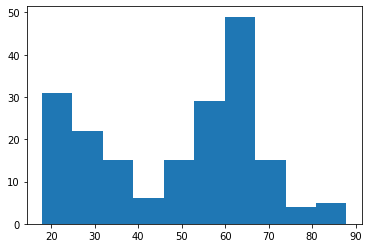

In [238]:
x = merged_who_data_2016['overweight']
plt.hist(x)
plt.show() 

In [239]:
merged.head()

,country,iso3,region,sub_region,population_2020
0,Afghanistan,AFG,Asia,Southern Asia,38928341.00
1,Angola,AGO,Africa,Sub-Saharan Africa,32866268.00
2,Albania,ALB,Europe,Southern Europe,2837743.00
3,Andorra,AND,Europe,Southern Europe,77265.00
4,United Arab Emirates,ARE,Asia,Western Asia,9890400.00


### Create final dataset from all datasets

In [240]:
final = pd.merge(merged, merged_who_data_2016, on=['iso3'], how='left')
final.head()

,country,iso3,region,sub_region,population_2020,year,parent_location,obesity_low,obesity,obesity_high,overweight_low,overweight,overweight_high,underweight_low,underweight,underweight_high
0,Afghanistan,AFG,Asia,Southern Asia,38928341.00,2016.00,Eastern Mediterranean,2.80,4.50,6.70,15.80,19.70,24.00,10.30,16.40,23.20
1,Angola,AGO,Africa,Sub-Saharan Africa,32866268.00,2016.00,Africa,4.20,6.80,10.30,19.00,23.90,29.20,7.70,13.70,21.00
2,Albania,ALB,Europe,Southern Europe,2837743.00,2016.00,Europe,17.40,22.30,27.40,53.80,58.70,63.50,0.60,1.30,2.60
3,Andorra,AND,Europe,Southern Europe,77265.00,2016.00,Europe,22.00,28.00,34.00,63.10,68.10,72.70,0.30,0.80,1.90
4,United Arab Emirates,ARE,Asia,Western Asia,9890400.00,2016.00,Eastern Mediterranean,24.00,29.90,36.00,60.70,65.90,71.00,0.90,1.70,3.00


In [241]:
final

,country,iso3,region,sub_region,population_2020,year,parent_location,obesity_low,obesity,obesity_high,overweight_low,overweight,overweight_high,underweight_low,underweight,underweight_high
0,Afghanistan,AFG,Asia,Southern Asia,38928341.00,2016.00,Eastern Mediterranean,2.80,4.50,6.70,15.80,19.70,24.00,10.30,16.40,23.20
1,Angola,AGO,Africa,Sub-Saharan Africa,32866268.00,2016.00,Africa,4.20,6.80,10.30,19.00,23.90,29.20,7.70,13.70,21.00
2,Albania,ALB,Europe,Southern Europe,2837743.00,2016.00,Europe,17.40,22.30,27.40,53.80,58.70,63.50,0.60,1.30,2.60
3,Andorra,AND,Europe,Southern Europe,77265.00,2016.00,Europe,22.00,28.00,34.00,63.10,68.10,72.70,0.30,0.80,1.90
4,United Arab Emirates,ARE,Asia,Western Asia,9890400.00,2016.00,Eastern Mediterranean,24.00,29.90,36.00,60.70,65.90,71.00,0.90,1.70,3.00
5,Argentina,ARG,Americas,Latin America and the Caribbean,45376763.00,2016.00,Americas,23.70,28.50,33.70,58.80,63.40,67.80,0.40,0.90,1.50
6,Armenia,ARM,Asia,Western Asia,2963234.00,2016.00,Europe,16.30,20.90,25.70,50.60,55.70,60.50,1.40,2.60,4.40
7,Antigua and Barbuda,ATG,Americas,Latin America and the Caribbean,97928.00,2016.00,Americas,13.90,19.10,24.80,42.50,48.40,54.50,2.20,4.70,8.50
8,Australia,AUS,Oceania,Australia and New Zealand,25687041.00,2016.00,Western Pacific,26.50,30.40,34.40,63.60,67.20,70.60,0.60,1.10,1.70
9,Austria,AUT,Europe,Western Europe,8917205.00,2016.00,Europe,17.50,21.90,26.80,53.30,58.10,62.50,0.80,1.60,3.00


#### Manually add Taiwan's population for 2020 (source: https://www.worldometers.info/world-population/taiwan-population/)

In [242]:
# TWN population in 2020: 23,816,775

final.loc[final['iso3'] == 'TWN', 'population_2020'] = 23816775
# add parent location
final.loc[final['iso3'] == 'TWN', 'parent_location'] = 'Western Pacific'

final


,country,iso3,region,sub_region,population_2020,year,parent_location,obesity_low,obesity,obesity_high,overweight_low,overweight,overweight_high,underweight_low,underweight,underweight_high
0,Afghanistan,AFG,Asia,Southern Asia,38928341.00,2016.00,Eastern Mediterranean,2.80,4.50,6.70,15.80,19.70,24.00,10.30,16.40,23.20
1,Angola,AGO,Africa,Sub-Saharan Africa,32866268.00,2016.00,Africa,4.20,6.80,10.30,19.00,23.90,29.20,7.70,13.70,21.00
2,Albania,ALB,Europe,Southern Europe,2837743.00,2016.00,Europe,17.40,22.30,27.40,53.80,58.70,63.50,0.60,1.30,2.60
3,Andorra,AND,Europe,Southern Europe,77265.00,2016.00,Europe,22.00,28.00,34.00,63.10,68.10,72.70,0.30,0.80,1.90
4,United Arab Emirates,ARE,Asia,Western Asia,9890400.00,2016.00,Eastern Mediterranean,24.00,29.90,36.00,60.70,65.90,71.00,0.90,1.70,3.00
5,Argentina,ARG,Americas,Latin America and the Caribbean,45376763.00,2016.00,Americas,23.70,28.50,33.70,58.80,63.40,67.80,0.40,0.90,1.50
6,Armenia,ARM,Asia,Western Asia,2963234.00,2016.00,Europe,16.30,20.90,25.70,50.60,55.70,60.50,1.40,2.60,4.40
7,Antigua and Barbuda,ATG,Americas,Latin America and the Caribbean,97928.00,2016.00,Americas,13.90,19.10,24.80,42.50,48.40,54.50,2.20,4.70,8.50
8,Australia,AUS,Oceania,Australia and New Zealand,25687041.00,2016.00,Western Pacific,26.50,30.40,34.40,63.60,67.20,70.60,0.60,1.10,1.70
9,Austria,AUT,Europe,Western Europe,8917205.00,2016.00,Europe,17.50,21.90,26.80,53.30,58.10,62.50,0.80,1.60,3.00


In [243]:
final.dtypes

country              object
iso3                 object
region               object
sub_region           object
population_2020     float64
year                float64
parent_location      object
obesity_low         float64
obesity             float64
obesity_high        float64
overweight_low      float64
overweight          float64
overweight_high     float64
underweight_low     float64
underweight         float64
underweight_high    float64
dtype: object

In [244]:
final.isna().sum()

country             0
iso3                0
region              0
sub_region          0
population_2020     0
year                3
parent_location     2
obesity_low         3
obesity             3
obesity_high        3
overweight_low      3
overweight          3
overweight_high     3
underweight_low     3
underweight         3
underweight_high    3
dtype: int64

### Impute missing values - selected 999 which is filtered out on the frontend

In [245]:
final.fillna(value = 999, inplace = True)
final['year'].unique()

array([2016.,  999.])

### Typecast columns

In [246]:
final = final.astype({"population_2020": int, "year": int})
final.dtypes

country              object
iso3                 object
region               object
sub_region           object
population_2020       int64
year                  int64
parent_location      object
obesity_low         float64
obesity             float64
obesity_high        float64
overweight_low      float64
overweight          float64
overweight_high     float64
underweight_low     float64
underweight         float64
underweight_high    float64
dtype: object

### Make final check for null values

In [247]:
final.isna().sum()

country             0
iso3                0
region              0
sub_region          0
population_2020     0
year                0
parent_location     0
obesity_low         0
obesity             0
obesity_high        0
overweight_low      0
overweight          0
overweight_high     0
underweight_low     0
underweight         0
underweight_high    0
dtype: int64

In [248]:
final

,country,iso3,region,sub_region,population_2020,year,parent_location,obesity_low,obesity,obesity_high,overweight_low,overweight,overweight_high,underweight_low,underweight,underweight_high
0,Afghanistan,AFG,Asia,Southern Asia,38928341,2016,Eastern Mediterranean,2.80,4.50,6.70,15.80,19.70,24.00,10.30,16.40,23.20
1,Angola,AGO,Africa,Sub-Saharan Africa,32866268,2016,Africa,4.20,6.80,10.30,19.00,23.90,29.20,7.70,13.70,21.00
2,Albania,ALB,Europe,Southern Europe,2837743,2016,Europe,17.40,22.30,27.40,53.80,58.70,63.50,0.60,1.30,2.60
3,Andorra,AND,Europe,Southern Europe,77265,2016,Europe,22.00,28.00,34.00,63.10,68.10,72.70,0.30,0.80,1.90
4,United Arab Emirates,ARE,Asia,Western Asia,9890400,2016,Eastern Mediterranean,24.00,29.90,36.00,60.70,65.90,71.00,0.90,1.70,3.00
5,Argentina,ARG,Americas,Latin America and the Caribbean,45376763,2016,Americas,23.70,28.50,33.70,58.80,63.40,67.80,0.40,0.90,1.50
6,Armenia,ARM,Asia,Western Asia,2963234,2016,Europe,16.30,20.90,25.70,50.60,55.70,60.50,1.40,2.60,4.40
7,Antigua and Barbuda,ATG,Americas,Latin America and the Caribbean,97928,2016,Americas,13.90,19.10,24.80,42.50,48.40,54.50,2.20,4.70,8.50
8,Australia,AUS,Oceania,Australia and New Zealand,25687041,2016,Western Pacific,26.50,30.40,34.40,63.60,67.20,70.60,0.60,1.10,1.70
9,Austria,AUT,Europe,Western Europe,8917205,2016,Europe,17.50,21.90,26.80,53.30,58.10,62.50,0.80,1.60,3.00


### Save the processed dataset

In [250]:
final.to_csv('data/ingestion/country_metadata.csv', encoding='utf-8')